In [1]:
# extract files
#file = open("./tiny-imagenet-200/wnids.txt", "r+")
#print (file)

In [2]:
import cv2
from os import listdir
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from scipy import ndimage, misc

In [3]:
import tensorflow as tf
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [4]:
##
# load all images in Training Directory
##
loaded_images = list()
loaded_y = list()
X_test = list()
img_size =128
!pwd
path ='./Images/'

clas_folder = path

dict={}
list_clas_folder = listdir(clas_folder)
#list_clas_folder.remove('.DS_Store')

/home/ecbm4040/stanford_results


./Images/n02105855-Shetland_sheepdog/n02105855_2933.jpg
Data Loaded


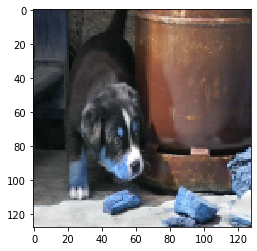

In [5]:
num_classes = len(list_clas_folder)

for i in range(num_classes):
    dict[str(i)] = list_clas_folder[i]
    folder_name = list_clas_folder[i]
    image_path = clas_folder + folder_name
    for filename in listdir(image_path):
        im2 = cv2.imread(image_path +'/'+ filename, cv2.IMREAD_UNCHANGED)
        img_data = cv2.resize(im2, (img_size, img_size),interpolation = cv2.INTER_AREA)
        if img_data.shape == (img_size, img_size, 3):
            loaded_images.append(img_data)
            loaded_y.append(i)
        else: 
            print(image_path +'/'+ filename)
print("Data Loaded")
plt.imshow(loaded_images[7])

In [6]:
seq = np.arange(len(loaded_y))
np.random.shuffle(seq)
print("shuffling..")
len(seq)
X_train1 = list()
y_train1 = list()
#loaded_images = loaded_images*(1.0/255)
for i in range(len(seq)):
    X_train1.append(loaded_images[seq[i]])
    y_train1.append(loaded_y[seq[i]])

shuffling..


(128, 128, 3)


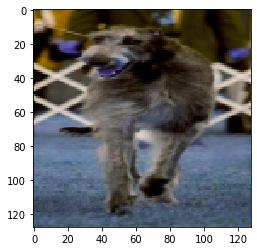

In [7]:


print(X_train1[10].shape)
X_train = np.asarray(X_train1)
plt.imshow(X_train[3])


shuffling done...
All data Loaded..


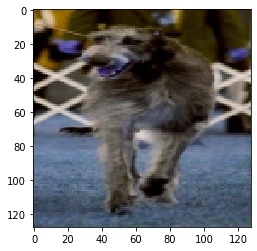

In [8]:
X_train  = X_train*(1./255)
y_train = np.asarray(y_train1)
print("shuffling done...")
print("All data Loaded..")
plt.imshow(X_train[3])

In [9]:
from tensorflow.keras.utils import to_categorical as one_hot
y_train = one_hot(y_train)
print("y_train_shape = " , y_train.shape)
X_val = X_train[-1000:]
y_val = y_train[-1000:]
X_test = X_train[-2000:-1000]
y_test = y_train[-2000:-1000]
X_train = X_train[:-2000]
y_train = y_train[:-2000]
print("X_val_shape = " ,X_val.shape)
print("X_train_shape = " ,X_train.shape)

y_train_shape =  (20579, 120)
X_val_shape =  (1000, 128, 128, 3)
X_train_shape =  (18579, 128, 128, 3)


In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

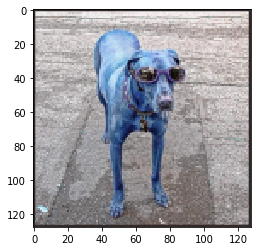

In [11]:
plt.imshow(X_train[7])
datagen.fit(X_train)
plt.imshow(X_train[7])


In [12]:
X_train.shape

(18579, 128, 128, 3)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization, Activation
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
#from keras.models import Sequential
#from keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
#import keras
print(tf.__version__)

1.13.1


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ZeroPadding2D, Conv2D, BatchNormalization, Activation, AveragePooling2D, DepthwiseConv2D, Flatten, Reshape, GlobalAveragePooling2D
#import keras
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3


base_model = InceptionV3(include_top = False, weights ='imagenet', input_shape = (128,128,3))
x = base_model.output
x = Conv2D(128, kernel_size=1, strides=1, activation = 'relu')(x)
x = Flatten()(x)
x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)
pred = Dense(120, activation ='softmax')(x)

In [37]:
model = Model(inputs = base_model.input, outputs = pred)
print(len(model.layers))
for layer in model.layers[:-5]:
    layer.trainable =False
for layer in model.layers[-5:]:
    layer.trainable = True

316


In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_380 (Conv2D)             (None, 63, 63, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_382 (Bat (None, 63, 63, 32)   96          conv2d_380[0][0]                 
__________________________________________________________________________________________________
activation_376 (Activation)     (None, 63, 63, 32)   0           batch_normalization_v1_382[0][0] 
__________________________________________________________________________________________________
conv2d_381

In [39]:
#model = Model(inputs=model.input, outputs =preds)
from tensorflow.keras.optimizers import Adam as Adam

adam = Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
#from tensorflow.keras.utils import multi_gpu_model
#from keras.application import Xception

#par_model = multi_gpu_model(model, gpus = 8)
#par_model.compile(optimizer=adam,
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

In [41]:
#history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))
model.fit_generator(datagen.flow(X_train, y_train, batch_size=256),
                    steps_per_epoch=len(X_train) / 256, epochs=15, validation_data = (X_val, y_val))

Epoch 1/15
73/73 [==============================] - 61s 835ms/step - loss: 4.8582 - acc: 0.0195 - val_loss: 8.0413 - val_acc: 0.0310
Epoch 2/15
73/73 [==============================] - 63s 866ms/step - loss: 4.5050 - acc: 0.0525 - val_loss: 5.7608 - val_acc: 0.1030
Epoch 3/15
73/73 [==============================] - 65s 884ms/step - loss: 4.2283 - acc: 0.0814 - val_loss: 6.6508 - val_acc: 0.1290
Epoch 4/15
73/73 [==============================] - 65s 884ms/step - loss: 4.0584 - acc: 0.1007 - val_loss: 6.7178 - val_acc: 0.1510
Epoch 5/15
73/73 [==============================] - 64s 883ms/step - loss: 3.9676 - acc: 0.1131 - val_loss: 6.5892 - val_acc: 0.1850
Epoch 6/15
73/73 [==============================] - 64s 883ms/step - loss: 3.8927 - acc: 0.1249 - val_loss: 7.2854 - val_acc: 0.1790
Epoch 7/15
73/73 [==============================] - 65s 887ms/step - loss: 3.8447 - acc: 0.1310 - val_loss: 7.0631 - val_acc: 0.2020
Epoch 8/15
73/73 [==============================] - 65s 890ms/step - 

In [42]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=128)

1000/1000 [==============================] - 2s 2ms/sample - loss: 6.7448 - acc: 0.2070


In [43]:
# Save the model
model.save('trained_model2_inception_128_all_god_data.h5')

In [ ]:
# Recreate the exact same model purely from the file
from keras.models import load_model
#new_model = load_model('path_to_my_model.h5')
classifierLoad = tf.keras.models.load_model('path_to_my_model.h5')

In [ ]:
classifierLoad.summary()